In [27]:
#Standard libraries
import os

# 3rd party libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
SCRIPT_DIR = os.getcwd()
PAR_DIR = os.path.abspath(os.path.join(os.getcwd(), os.pardir)) 
DATA_DIR = os.path.join(PAR_DIR, 'Data')
OUTPUT_DIR = os.path.join(PAR_DIR, 'Output')

In [15]:
dengai_train_features = pd.read_csv(os.path.join(DATA_DIR, 'dengue_features_train.csv'))
print('Size of training features data set: \n', dengai_train_features.shape)
print('Features: \n', dengai_train_features.columns)
dengai_train_labels = pd.read_csv(os.path.join(DATA_DIR, 'dengue_labels_train.csv'))
print('Size of training labels data set: ', dengai_train_labels.shape)
print('Labels: \n', dengai_train_labels.columns)
dengai_test_features = pd.read_csv(os.path.join(DATA_DIR, 'dengue_features_test.csv'))
print('Size of test features data set: ', dengai_test_features.shape)

Size of training features data set: 
 (1456, 24)
Features: 
 Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')
Size of training labels data set:  (1456, 4)
Labels: 
 Index(['city', 'year', 'weekofyear', 'total_cases'], dtype='object')
Size of test features data set:  (416, 24)


In [16]:
dengai_train_features.head(10)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
5,sj,1990,23,1990-06-04,NaN,0.174850,0.254314,0.181743,9.58,299.630000,...,26.49,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1
6,sj,1990,24,1990-06-11,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,...,38.60,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7
7,sj,1990,25,1990-06-18,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,...,30.00,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1
8,sj,1990,26,1990-06-25,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,...,37.51,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1
9,sj,1990,27,1990-07-02,NaN,0.121550,0.160683,0.202567,14.41,300.154286,...,28.40,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1


NOAA's CDR Normalized Difference Vegetation Index (0.5x0.5 degree scale) measurements

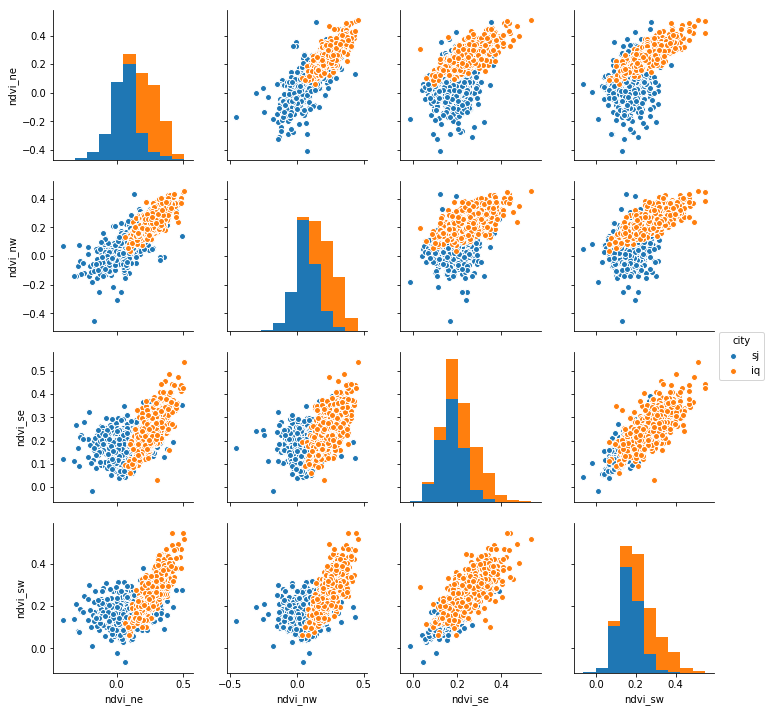

In [32]:
sns.pairplot(data=dengai_train_features[['city', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']].dropna(),
            hue='city',
            vars=dengai_train_features[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']].dropna())

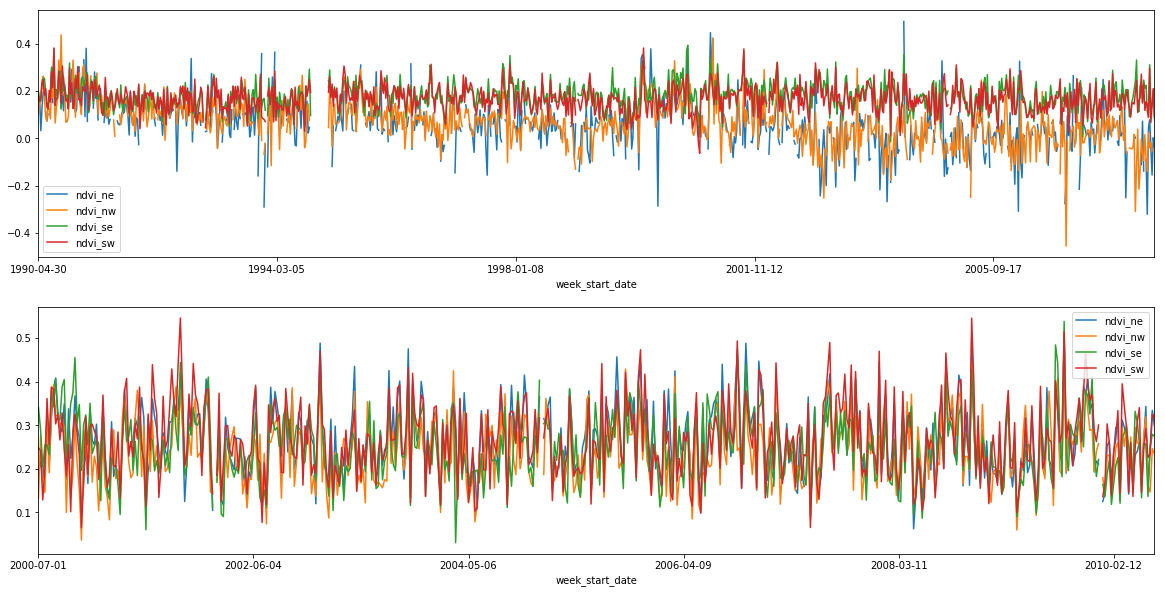

In [50]:
fig, ax = plt.subplots(2, 1, figsize=(20, 10))
city1 = (dengai_train_features['city'] == 'sj')
city2 = (dengai_train_features['city'] == 'iq')
dengai_train_features.loc[city1, :].plot(x='week_start_date', y=['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw'], ax=ax[0])
dengai_train_features.loc[city2, :].plot(x='week_start_date', y=['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw'], ax=ax[1])

NOAA's GHCN daily climate data weather station measurements

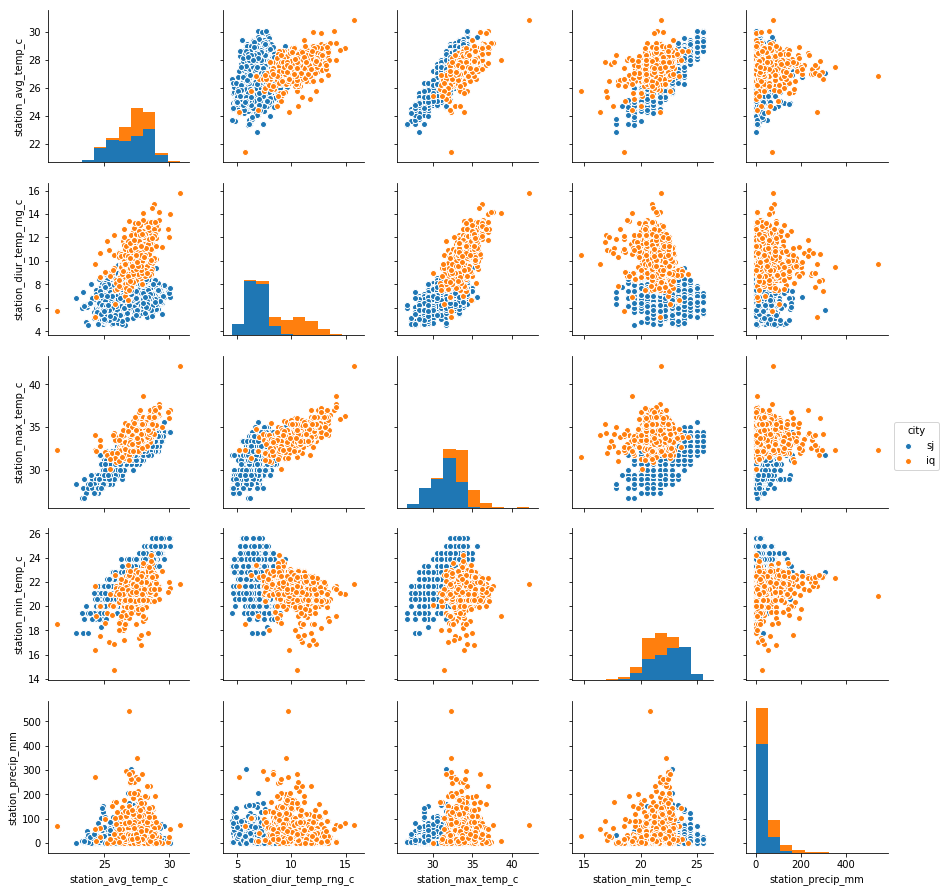

In [33]:
sns.pairplot(data=dengai_train_features[['city', 'station_avg_temp_c', 'station_diur_temp_rng_c', 
                                         'station_max_temp_c', 'station_min_temp_c', 'station_precip_mm']].dropna(),
            hue='city',
            vars=dengai_train_features[['station_avg_temp_c', 'station_diur_temp_rng_c', 
                                        'station_max_temp_c', 'station_min_temp_c', 'station_precip_mm']].dropna())

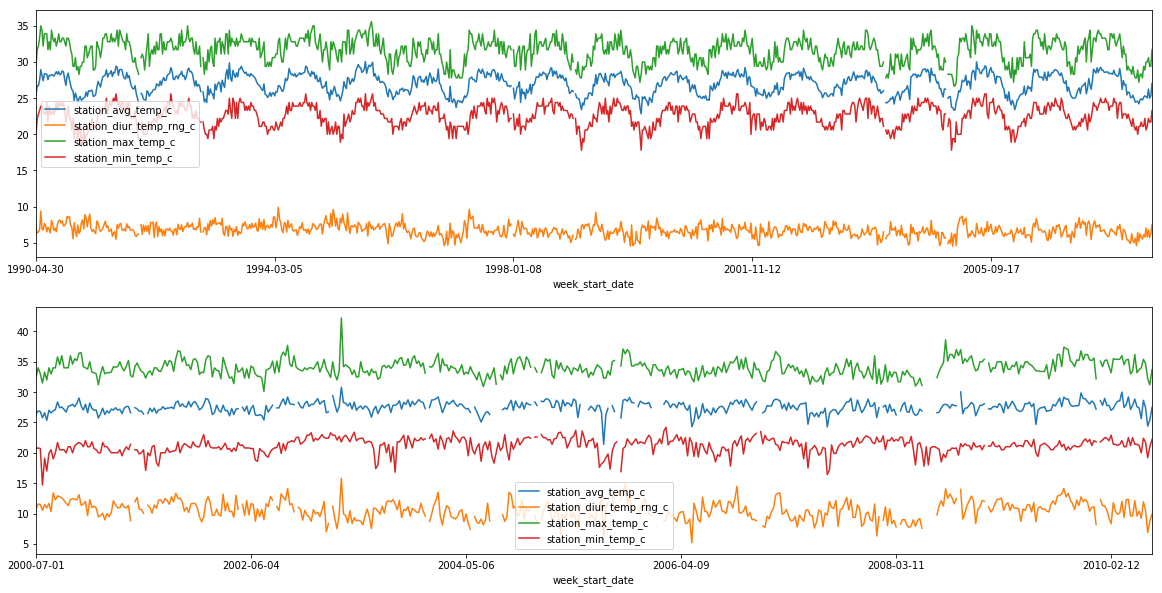

In [51]:
fig, ax = plt.subplots(2, 1, figsize=(20, 10))
city1 = (dengai_train_features['city'] == 'sj')
city2 = (dengai_train_features['city'] == 'iq')
dengai_train_features.loc[city1, :].plot(x='week_start_date', y=['station_avg_temp_c', 'station_diur_temp_rng_c', 
                                         'station_max_temp_c', 'station_min_temp_c'], ax=ax[0])
dengai_train_features.loc[city2, :].plot(x='week_start_date', y=['station_avg_temp_c', 'station_diur_temp_rng_c', 
                                         'station_max_temp_c', 'station_min_temp_c'], ax=ax[1])

NOAA's NCEP Climate Forecast System Reanalysis measurements

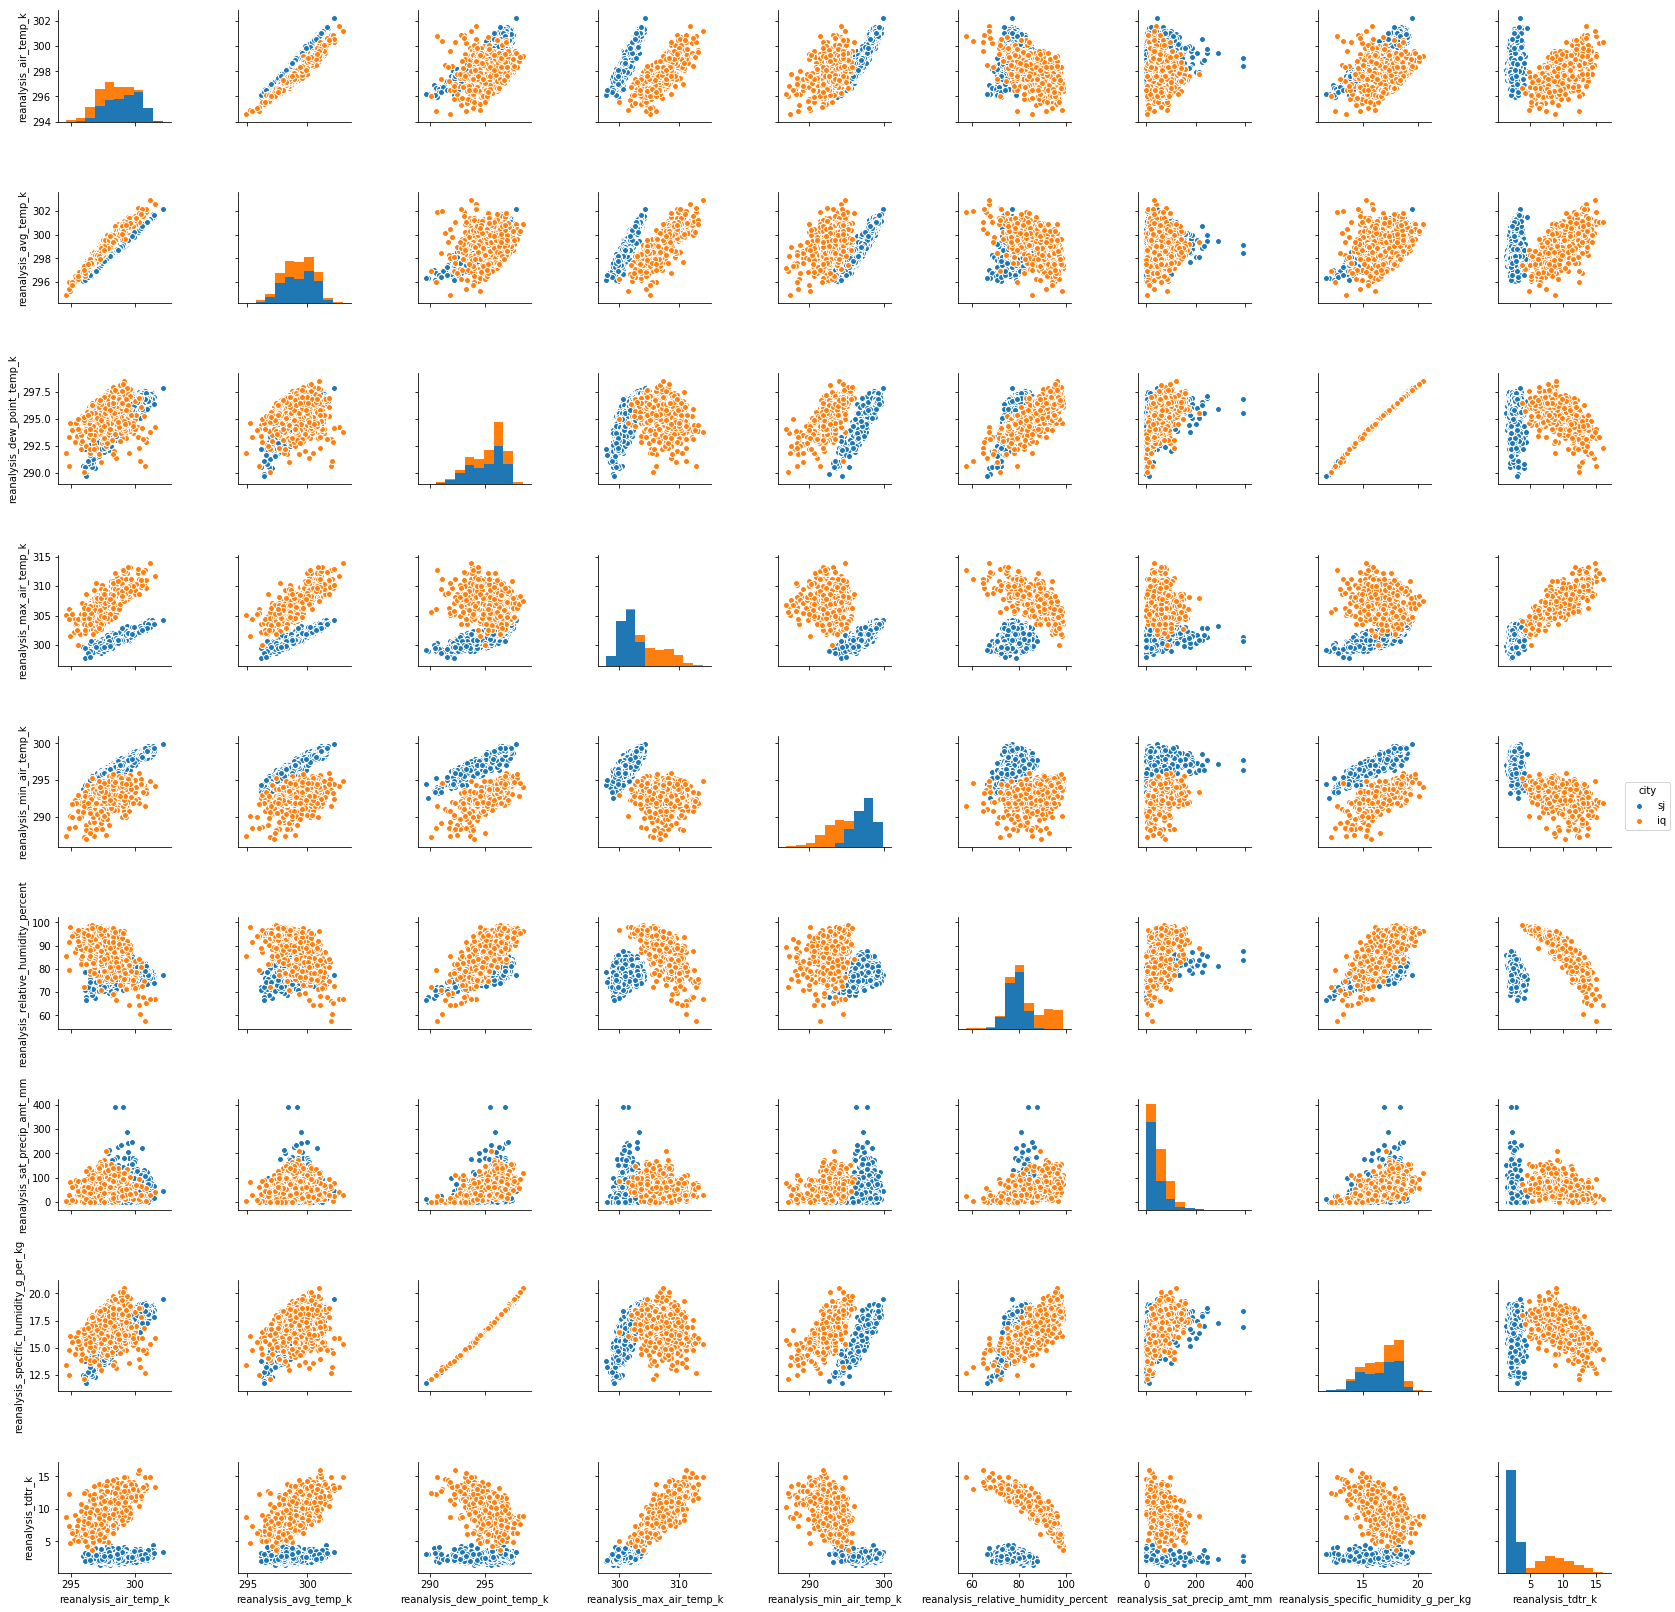

In [34]:
sns.pairplot(data=dengai_train_features[['city', 'reanalysis_air_temp_k',
                                         'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
                                         'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
                                         'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
                                         'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k']].dropna(),
            hue='city',
            vars=dengai_train_features[['reanalysis_air_temp_k',
                                         'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
                                         'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
                                         'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
                                         'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k']].dropna())

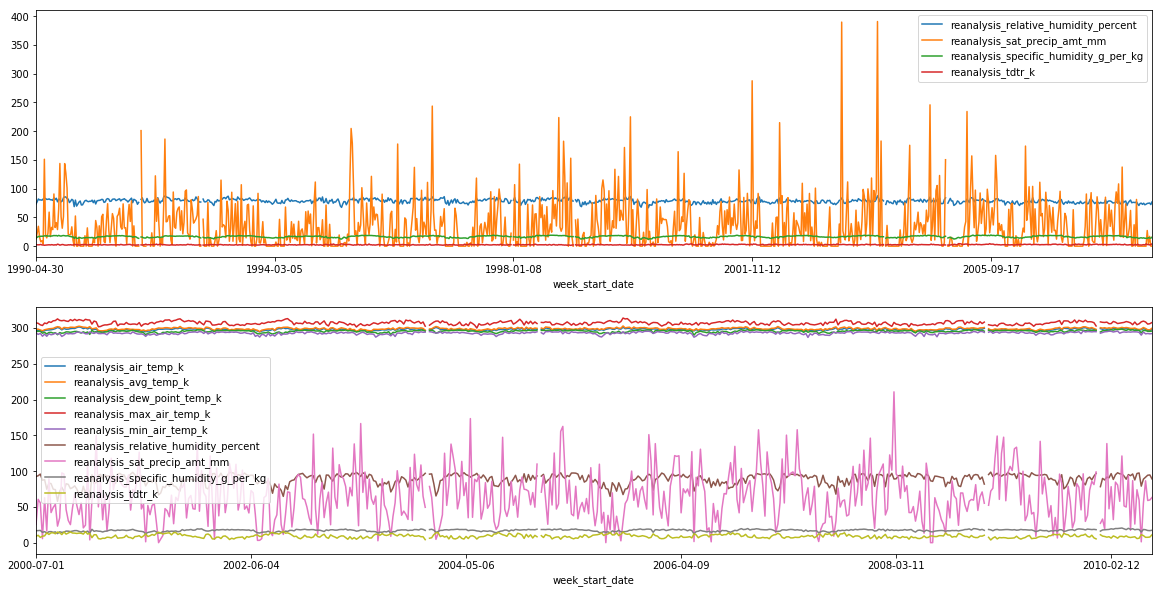

In [53]:
fig, ax = plt.subplots(2, 1, figsize=(20, 10))
city1 = (dengai_train_features['city'] == 'sj')
city2 = (dengai_train_features['city'] == 'iq')
dengai_train_features.loc[city1, :].plot(x='week_start_date', y=['reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
                                         'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k'], 
                                         secondary_y=['reanalysis_air_temp_k',
                                         'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
                                         'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k'], ax=ax[0])
dengai_train_features.loc[city2, :].plot(x='week_start_date', y=['reanalysis_air_temp_k',
                                         'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
                                         'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
                                         'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
                                         'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k'], ax=ax[1])

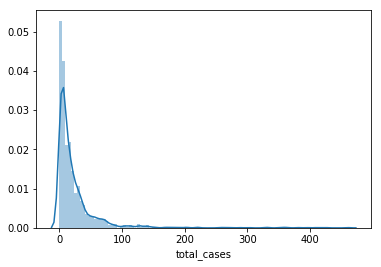

In [38]:
sns.distplot(dengai_train_labels.total_cases, bins=100)